In [2]:
!pip install requests

In [3]:
!pip install bs4

In [49]:
import requests
import bs4

In [50]:
import pandas as pd
from bs4 import BeautifulSoup
from datetime import datetime

In [51]:
# Header to set the requests as a browser requests
headers = {
    'authority': 'www.amazon.com',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9,bn;q=0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'
}

In [52]:
# URL of The amazon Review page
reviews_url ='https://www.amazon.com/Xiaomi-Global-Unlocked-Tmobile-Charger/product-reviews/B0BT8GZV65/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews'

In [53]:
# Define Page No
len_page = 6

In [54]:
# Extra Data as Html object from amazon Review page
def reviewsHtml(url, len_page):
    
    # Empty List define to store all pages html data
    soups = []
    
    # Loop for gather all 3000 reviews from 300 pages via range
    for page_no in range(1, len_page + 1):
        
        # parameter set as page no to the requests body
        params = {
            'ie': 'UTF8',
            'reviewerType': 'all_reviews',
            'filterByStar': 'critical',
            'pageNumber': page_no,
        }
        
        # Request make for each page
        response = requests.get(url, headers=headers)
        
        # Save Html object by using BeautifulSoup4 and lxml parser
        soup = BeautifulSoup(response.text, 'lxml')
        
        # Add single Html page data in master soups list
        soups.append(soup)
        
    return soups

In [10]:
# Grab Reviews name, description, date, stars, title from HTML
def getReviews(html_data):

    # Create Empty list to Hold all data
    data_dicts = []
    
    # Select all Reviews BOX html using css selector
    boxes = html_data.select('div[data-hook="review"]')
    
    # Iterate all Reviews BOX 
    for box in boxes:
        
        # Select Name using css selector and cleaning text using strip()
        # If Value is empty define value with 'N/A' for all.
        try:
            name = box.select_one('[class="a-profile-name"]').text.strip()
        except Exception as e:
            name = 'N/A'

        try:
            stars = box.select_one('[data-hook="review-star-rating"]').text.strip().split(' out')[0]
        except Exception as e:
            stars = 'N/A'   

        try:
            title = box.select_one('[data-hook="review-title"]').text.strip()
        except Exception as e:
            title = 'N/A'

        try:
            # Convert date str to dd/mm/yyy format
            datetime_str = box.select_one('[data-hook="review-date"]').text.strip().split(' on ')[-1]
            date = datetime.strptime(datetime_str, '%B %d, %Y').strftime("%d/%m/%Y")
        except Exception as e:
            date = 'N/A'

        try:
            description = box.select_one('[data-hook="review-body"]').text.strip()
        except Exception as e:
            description = 'N/A'

        # create Dictionary with al review data 
        data_dict = {
            'Name' : name,
            'Stars' : stars,
            'Title' : title,
            'Date' : date,
            'Description' : description
        }

        # Add Dictionary in master empty List
        data_dicts.append(data_dict)
    
    return data_dicts

In [11]:
pip install lxml

In [55]:
# Grab all HTML
html_datas = reviewsHtml(reviews_url, len_page)

In [56]:
# Empty List to Hold all reviews data
reviews = []

In [57]:
# Iterate all Html page 
for html_data in html_datas:
    
    # Grab review data
    review = getReviews(html_data)
    
    # add review data in reviews empty list
    reviews += review

In [58]:
# Create a dataframe with reviews Data
df_reviews = pd.DataFrame(reviews)

In [59]:
df_reviews

,Name,Stars,Title,Date,Description
0,Nik Gordon,5.0,5.0 out of 5 stars\nWORKS WITH VERIZON AND T-M...,29/11/2023,Phone was delivered on time great packaging an...
1,Col J,5.0,5.0 out of 5 stars\nNice phone,25/11/2023,"I use Samsung Galaxy phones for years, but I d..."
2,JN,5.0,5.0 out of 5 stars\nFantastico,12/11/2023,Es un celular que cumple con todas la expectat...
3,carlos velasquez,5.0,5.0 out of 5 stars\nPasa la prueba,21/10/2023,Como un teléfono de gama media es muy bueno. H...
4,Jesse6749,5.0,5.0 out of 5 stars\nExcellent phone for the price,04/10/2023,I bought this to replace a good phone the Xiao...
5,Carlos Marcano,5.0,5.0 out of 5 stars\nProducto entregado a tiempo.,30/10/2023,"Me encantó, el teléfono es muy bonito, funcion..."
6,drex,4.0,4.0 out of 5 stars\nGood smartphone,04/09/2023,"I was reading the seller instructions, and the..."
7,David Stidham,5.0,5.0 out of 5 stars\nGreat smartphone,26/08/2023,Ive had this phone for a couple of months now ...
8,JoJo,3.0,3.0 out of 5 stars\nPhone does not appear to w...,30/10/2023,The plus side of this product is that it came ...
9,Alex Mont,5.0,5.0 out of 5 stars\nWorks great for T-Mobile,10/07/2023,A lot of people have mentioned how this phone ...


In [60]:
# Save data
df_reviews.to_csv('reviews.csv', index=False)

In [18]:
!pip install nltk

In [19]:
!pip install textblob

In [20]:
!pip install wordcloud

In [62]:
from warnings import filterwarnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.preprocessing import LabelEncoder
from textblob import Word, TextBlob
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
import nltk
#nltk.download("stopwords")
#nltk.download("wordnet")
#nltk.download("vader_lexicon")

filterwarnings("ignore")
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [63]:
df = pd.read_csv("reviews.csv", sep=",")
df.head()

,Name,Stars,Title,Date,Description
0,Nik Gordon,5.00,5.0 out of 5 stars\nWORKS WITH VERIZON AND T-M...,29/11/2023,Phone was delivered on time great packaging an...
1,Col J,5.00,5.0 out of 5 stars\nNice phone,25/11/2023,"I use Samsung Galaxy phones for years, but I d..."
2,JN,5.00,5.0 out of 5 stars\nFantastico,12/11/2023,Es un celular que cumple con todas la expectat...
3,carlos velasquez,5.00,5.0 out of 5 stars\nPasa la prueba,21/10/2023,Como un teléfono de gama media es muy bueno. H...
4,Jesse6749,5.00,5.0 out of 5 stars\nExcellent phone for the price,04/10/2023,I bought this to replace a good phone the Xiao...


In [64]:
def text_preprocessing(dataframe, dependent_var):
  # Normalizing Case Folding - Uppercase to Lowercase
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x.lower() for x in str(x).split()))

  # Removing Punctuation
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('[^\w\s]','')

  # Removing Numbers
  dataframe[dependent_var] = dataframe[dependent_var].str.replace('\d','')

  # StopWords
  sw = stopwords.words('english')
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

  # Remove Rare Words
  temp_df = pd.Series(' '.join(dataframe[dependent_var]).split()).value_counts()
  drops = temp_df[temp_df <= 1]
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join(x for x in str(x).split() if x not in drops))

  # Lemmatize
  dataframe[dependent_var] = dataframe[dependent_var].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

  return dataframe

In [65]:
df = text_preprocessing(df, "Description")

In [66]:
df["Description"].head()

0    phone delivered time great packaging give driv...
1    use samsung galaxy phone years, decide try xia...
2    e un celular que cumple con toda la expectativ...
3    como un teléfono de gama medium e muy bueno. h...
4    bought replace good phone xiaomi t12 liked def...
Name: Description, dtype: object

In [67]:
def text_visulaization(dataframe, dependent_var, barplot=True, wordcloud=True):
  # Calculation of Term Frequencies
  tf = dataframe[dependent_var].apply(lambda x: pd.value_counts(x.split(" "))).sum(axis=0).reset_index()
  tf.columns = ["words", "tf"]

  if barplot:
    # Bar Plot
    tf[tf["tf"]>30].plot.barh(x="words", y="tf")
    plt.title("Calculation of Term Frequencies : barplot")
    plt.show()

  if wordcloud:
    # WordCloud
    text = " ".join(i for i in dataframe[dependent_var])
    wordcloud = WordCloud(max_font_size=100, max_words=1000, background_color="white").generate(text)
    plt.figure(figsize=[10, 10])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Calculation of Term Frequencies : wordcloud")
    plt.show()
    wordcloud.to_file("wordcloud.png")

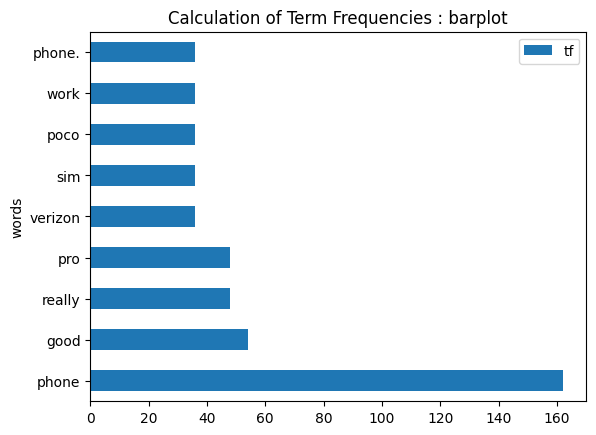

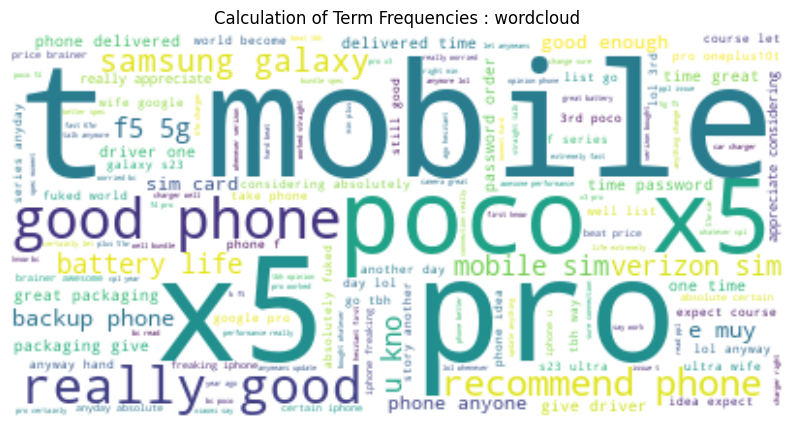

In [68]:
text_visulaization(df, "Description")

In [69]:
def create_polarity_scores(dataframe, dependent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe["polarity_score"] = dataframe[dependent_var].apply(lambda x: sia.polarity_scores(x)["compound"])

In [70]:
create_polarity_scores(df, "Description")

In [71]:
df.head()

,Name,Stars,Title,Date,Description,polarity_score
0,Nik Gordon,5.00,5.0 out of 5 stars\nWORKS WITH VERIZON AND T-M...,29/11/2023,phone delivered time great packaging give driv...,0.99
1,Col J,5.00,5.0 out of 5 stars\nNice phone,25/11/2023,"use samsung galaxy phone years, decide try xia...",0.89
2,JN,5.00,5.0 out of 5 stars\nFantastico,12/11/2023,e un celular que cumple con toda la expectativ...,0.00
3,carlos velasquez,5.00,5.0 out of 5 stars\nPasa la prueba,21/10/2023,como un teléfono de gama medium e muy bueno. h...,-0.56
4,Jesse6749,5.00,5.0 out of 5 stars\nExcellent phone for the price,04/10/2023,bought replace good phone xiaomi t12 liked def...,0.89


In [72]:
# Create Lables
def create_label(dataframe, dependent_var, independent_var):
  sia = SentimentIntensityAnalyzer()
  dataframe[independent_var] = dataframe[dependent_var].apply(lambda x: "pos" if sia.polarity_scores(x)["compound"] > 0 else "neg")
  dataframe[independent_var] = LabelEncoder().fit_transform(dataframe[independent_var])

  X = dataframe[dependent_var]
  y = dataframe[independent_var]

  return X, y

In [73]:
X, y = create_label(df, "Description", "sentiment_label")

In [74]:
# Split Dataset
def split_dataset(dataframe, X, y):
  train_x, test_x, train_y, test_y = train_test_split(X, y, random_state=1)
  return train_x, test_x, train_y, test_y

In [75]:
train_x, test_x, train_y, test_y = split_dataset(df, X, y)

In [76]:
def create_features_count(train_x, test_x):
  # Count Vectors
  vectorizer = CountVectorizer()
  x_train_count_vectorizer = vectorizer.fit_transform(train_x)
  x_test_count_vectorizer = vectorizer.fit_transform(test_x)

  return x_train_count_vectorizer, x_test_count_vectorizer

In [77]:
x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)

In [78]:
def create_features_TFIDF_word(train_x, test_x):
  # TF-IDF word
  tf_idf_word_vectorizer = TfidfVectorizer()
  x_train_tf_idf_word = tf_idf_word_vectorizer.fit_transform(train_x)
  x_test_tf_idf_word = tf_idf_word_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_word, x_test_tf_idf_word

In [79]:
x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)

In [80]:
def create_features_TFIDF_ngram(train_x, test_x):
  # TF-IDF ngram
  tf_idf_ngram_vectorizer = TfidfVectorizer(ngram_range=(2,3))
  x_train_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(train_x)
  x_test_tf_idf_ngram = tf_idf_ngram_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_ngram, x_test_tf_idf_ngram

In [81]:
x_train_tf_idf_ngram, x_test_tf_idf_ngram = create_features_TFIDF_ngram(train_x, test_x)

In [82]:
def create_features_TFIDF_chars(train_x, test_x):
  # TF-IDF Characters
  tf_idf_chars_vectorizer = TfidfVectorizer(analyzer="char", ngram_range=(2,3))
  x_train_tf_idf_chars = tf_idf_chars_vectorizer.fit_transform(train_x)
  x_test_tf_idf_chars = tf_idf_chars_vectorizer.fit_transform(test_x)

  return x_train_tf_idf_chars, x_test_tf_idf_chars

In [83]:
x_train_tf_idf_chars, x_test_tf_idf_chars = create_features_TFIDF_chars(train_x, test_x)

In [84]:
# Random Forest
def crate_model_randomforest(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  rf_count = RandomForestClassifier()
  rf_model_count = rf_count.fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(rf_model_count, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  # TF-IDF Word
  x_train_tf_idf_word, x_test_tf_idf_word = create_features_TFIDF_word(train_x, test_x)
  rf_word = RandomForestClassifier()
  rf_model_word = rf_word.fit(x_train_tf_idf_word, train_y)
  accuracy_word = cross_val_score(rf_model_word, x_test_tf_idf_word, test_y, cv=10).mean()
  print("Accuracy - TF-IDF Word: %.3f" % accuracy_word)

  # TF-IDF ngram
  x_train_tf_idf_ngram, x_test_tf_idf_ngram = create_features_TFIDF_ngram(train_x, test_x)
  rf_ngram = RandomForestClassifier()
  rf_model_ngram = rf_ngram.fit(x_train_tf_idf_ngram, train_y)
  accuracy_ngram = cross_val_score(rf_model_ngram, x_test_tf_idf_ngram, test_y, cv=10).mean()
  print("Accuracy TF-IDF ngram: %.3f" % accuracy_ngram)

  # TF-IDF chars

  rf_chars = RandomForestClassifier()
  rf_model_chars = rf_chars.fit(x_train_tf_idf_chars, train_y)
  accuracy_chars = cross_val_score(rf_model_chars, x_test_tf_idf_chars, test_y, cv=10).mean()
  print("Accuracy TF-IDF Characters: %.3f" % accuracy_chars)

  return rf_model_count, rf_model_word, rf_model_ngram, rf_model_chars

In [85]:
rf_model_count, rf_model_word, rf_model_ngram, rf_model_chars = crate_model_randomforest(train_x, test_x)

Accuracy - Count Vectors: 0.900
Accuracy - TF-IDF Word: 0.900
Accuracy TF-IDF ngram: 0.900
Accuracy TF-IDF Characters: 0.900


In [86]:
def model_tuning_randomforest(train_x, test_x):
  # Count
  x_train_count_vectorizer, x_test_count_vectorizer = create_features_count(train_x, test_x)
  rf_model_count = RandomForestClassifier(random_state=42)
  rf_params = {"max_depth": [1,2,5,8],
               "max_features": [2,5,8, "auto"],
               "n_estimators": [100,200,300],
               "min_samples_split": [2,5,10]}
  rf_best_grid = GridSearchCV(rf_model_count, rf_params, cv=10, n_jobs=-1, verbose=2).fit(x_train_count_vectorizer, train_y)
  rf_model_count_final = rf_model_count.set_params(**rf_best_grid.best_params_, random_state=1).fit(x_train_count_vectorizer, train_y)
  accuracy_count = cross_val_score(rf_model_count_final, x_test_count_vectorizer, test_y, cv=10).mean()
  print("Accuracy - Count Vectors: %.3f" % accuracy_count)

  return rf_model_count_final

In [87]:
rf_model_count_final = model_tuning_randomforest(train_x, test_x)


Fitting 10 folds for each of 144 candidates, totalling 1440 fits
Accuracy - Count Vectors: 0.900


In [110]:
def predict_count(train_x, model, new_comment):
  new_comment= pd.Series(new_comment)
  new_comment = CountVectorizer().fit(train_x).transform(new_comment)
  result = model.predict(new_comment)
  print(result)
  if result==1:
    print("Comment is Positive")
      
  else: 
    print("Comment is Negative")

In [107]:
import pickle
with open("news-Predict.pkl",'wb') as f:
    pickle.dump(rf_model_count,f)
with open("rf_model_word.pkl",'wb') as f:
    pickle.dump(rf_model_word,f)
with open('rf_model_ngram','wb') as d:
    pickle.dump(rf_model_ngram,d)
with open('rf_model_chars','wb') as s:
    pickle.dump(rf_model_chars,s)

In [111]:
# Random Forest
predict_count(train_x, model=rf_model_word, new_comment="""For the last 3 years i am using this phone.. i am very happy to use this..""")
predict_count(train_x, model=rf_model_word, new_comment="""hi their is good positive signs""")

[1]
Comment is Positive
[1]
Comment is Positive


In [104]:
# Sample Review
new_comment=pd.Series(df["Description"].sample(30).values)
#print(new_comment[1])
print(new_comment)

0     encantó, el teléfono e muy bonito, funciona ex...
1     plus side product came 2 day earlier scheduled...
2     lot people mentioned phone 5g us. use phone ev...
3     encantó, el teléfono e muy bonito, funciona ex...
4     e un celular que cumple con toda la expectativ...
5     ive phone couple month great. solid battery li...
6     como un teléfono de gama medium e muy bueno. h...
7     use samsung galaxy phone years, decide try xia...
8     use samsung galaxy phone years, decide try xia...
9     lot people mentioned phone 5g us. use phone ev...
10    use samsung galaxy phone years, decide try xia...
11    bought replace good phone xiaomi t12 liked def...
12    phone delivered time great packaging give driv...
13    lot people mentioned phone 5g us. use phone ev...
14    reading seller instructions, phone work perfec...
15    plus side product came 2 day earlier scheduled...
16    plus side product came 2 day earlier scheduled...
17    como un teléfono de gama medium e muy buen

In [112]:
# Sample Review - Random Forest
for i in range(len(new_comment)):
    predict_count(train_x, model=rf_model_count, new_comment=new_comment[i])

[0]
Comment is Negative
[1]
Comment is Positive
[1]
Comment is Positive
[0]
Comment is Negative
[0]
Comment is Negative
[1]
Comment is Positive
[0]
Comment is Negative
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[0]
Comment is Negative
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[1]
Comment is Positive
[0]
Comment is Negative
[0]
Comment is Negative
[1]
Comment is Positive
[1]
Comment is Positive
[0]
Comment is Negative
[1]
Comment is Positive
[1]
Comment is Positive


In [98]:
df['Description']

0     phone delivered time great packaging give driv...
1     use samsung galaxy phone years, decide try xia...
2     e un celular que cumple con toda la expectativ...
3     como un teléfono de gama medium e muy bueno. h...
4     bought replace good phone xiaomi t12 liked def...
5     encantó, el teléfono e muy bonito, funciona ex...
6     reading seller instructions, phone work perfec...
7     ive phone couple month great. solid battery li...
8     plus side product came 2 day earlier scheduled...
9     lot people mentioned phone 5g us. use phone ev...
10    phone delivered time great packaging give driv...
11    use samsung galaxy phone years, decide try xia...
12    e un celular que cumple con toda la expectativ...
13    como un teléfono de gama medium e muy bueno. h...
14    bought replace good phone xiaomi t12 liked def...
15    encantó, el teléfono e muy bonito, funciona ex...
16    reading seller instructions, phone work perfec...
17    ive phone couple month great. solid batter